# **Convolutions, Blurring and Sharpening Images**

####**In this lesson we'll learn:**
1. Convolution Operations
2. Blurring
3. Denoising
4. Sharpening

### **Blurring using Convolutions**

컨볼루션(중첩적분)을 사용하여 블러처리

In [3]:
# 라이브러리 임포트
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

# 이미지를 보여주는 함수 정의
def imshow(title = "image", image=None, size=10):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size*aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
  plt.title(title)
  plt.show()

# 이미지를 다운받고 압축을 풀자
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-09-20 02:07:39--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.14
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  19.7MB/s    in 1.4s    

2022-09-20 02:07:41 (19.7 MB/s) - ‘images.zip’ saved [29586716/29586716]



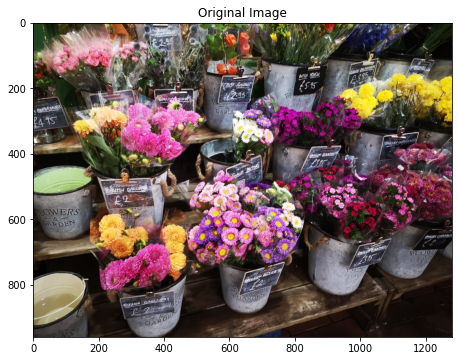

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


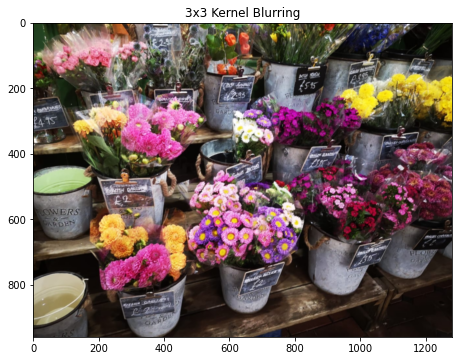

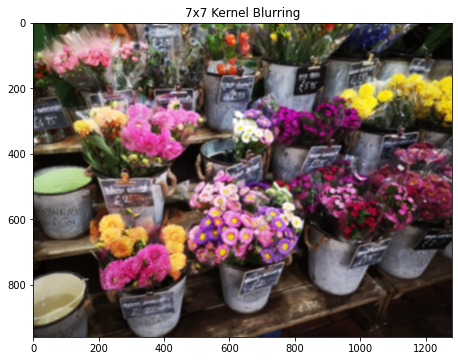

In [7]:
import cv2
import numpy as np

image = cv2.imread('images/flowers.jpeg')
imshow('Original Image', image)

#3X3짜리 커널을 만들자 #필터를 만들었다.
kernel_3x3 = np.ones((3, 3), np.float32) / 9
print( np.ones((3, 3), np.float32))
kernel_3x3

#cv2.filter2D를 사용하여 이미지와 커널을 컨볼브 시킨다.
blurred = cv2.filter2D(image, -1, kernel_3x3) # -1은 입력 영상과 동일한 데이터의 출력 영상
imshow('3x3 Kernel Blurring', blurred)

# 7X7짜리 커널을 만들자 #필터를 만들었다.
kernel_7x7 = np.ones((7, 7), np.float32) / 49

#7X7짜리 필터를 사용해보자
blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)


블러처리를 하는 방법이라고 생각하자


### **Other commonly used blurring methods in OpenCV**
- Regular Blurring
- Gaussian Blurring
- Median Blurring

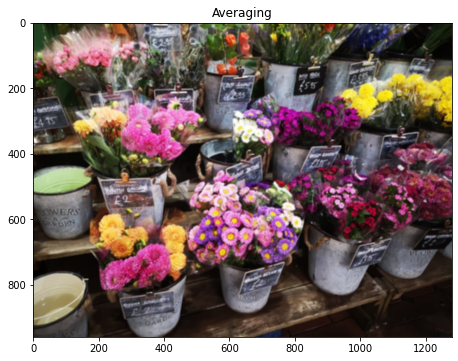

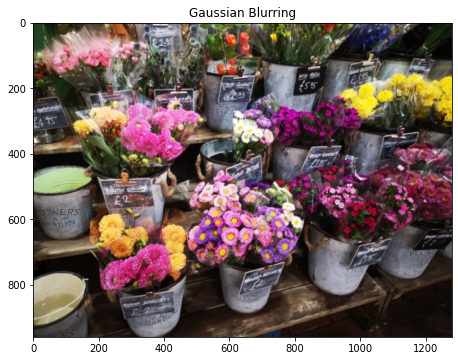

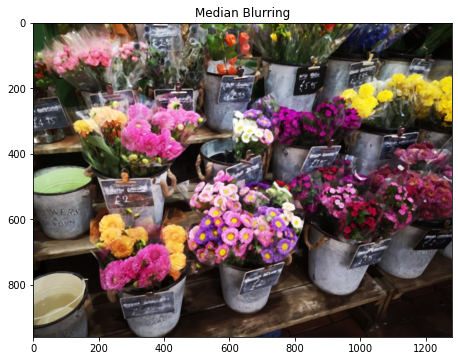

In [9]:
import cv2
import numpy as np

image = cv2.imread('images/flowers.jpeg')

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (5,5)) # 아래의 픽셀을 가져와서 중앙 요소를 대체한다.
imshow('Averaging', blur)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5) #커널 영역 및 중앙 아래의 모든 픽셀의 중앙값을 취합니다.
imshow('Median Blurring', median)